# 4.10 Coding Etiquette & Excel Reporting

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
# Set Path
path = r'C:\Users\cshat\06-2023 Instacart Basket Analysis'

In [3]:
# Import Dataframe
df = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'cust_ords_prods_merged_2.pkl'))

In [4]:
df.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,frequency_flag,first_name,last_name,gender,state,age,date_joined,dependants,marital_status,income
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,Non-frequent customer,Linda,Nguyen,Female,Alabama,31,2/17/2019,3,married,40423


In [5]:
df.shape

(32404859, 32)

# Security Implications

In [4]:
# Remove Customer Names
df_2 = df_2.drop(columns = ['first_name'])
df_2 = df_2.drop(columns = ['last_name'])

In [5]:
df_2.head()

,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_last_order,product_id,add_to_cart_order,reordered,product_name,...,median_days,frequency_flag,gender,state,age,date_joined,dependants,marital_status,income,exclusion_flag
0,2539329,1,1,2,8,NaN,196,1,0,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,High Activity Customer
1,2398795,1,2,3,7,15.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,High Activity Customer
2,473747,1,3,3,12,21.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,High Activity Customer
3,2254736,1,4,4,7,29.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,High Activity Customer
4,431534,1,5,4,15,28.0,196,1,1,Soda,...,20.5,Non-frequent customer,Female,Alabama,31,2/17/2019,3,married,40423,High Activity Customer


# Regional Segmentation

In [4]:
northeast = ["Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", "New York", "Pennsylvania", "New Jersey"]

In [5]:
south = ["Delaware", "Maryland", "District of Columbia", "Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky", "Tennessee", "Mississippi", "Alabama", "Oklahoma", "Texas", "Arkansas", "Louisiana"]

In [6]:
midwest = ["Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", "North Dakota", "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"]

In [7]:
west = ["Idaho", "Montana", "Wyoming", "Nevada", "Utah", "Colorado", "Arizona", "New Mexico", "Alaska", "Washington", "Oregon", "California", "Hawaii"]

In [8]:
df_2.loc[df_2['state'].isin(northeast), "region"] = "Northeast"

In [9]:
df_2.loc[df_2['state'].isin(south), "region"] = "South"

In [10]:
df_2.loc[df_2['state'].isin(midwest), "region"] = "Midwest"

In [11]:
df_2.loc[df_2['state'].isin(west), "region"] = "West"

In [12]:
df_2['region'].value_counts(dropna = False)

South        10311139
West          7927227
Midwest       7261513
Northeast     5464685
Name: region, dtype: int64

# Spending Habits

In [17]:
# Create Crosstab
crosstab = pd.crosstab(df['spending_flag'], df['region'])

In [18]:
crosstab

region,Midwest,Northeast,South,West
spending_flag,,,,
High spender,29265,18642,40564,31223
Low spender,7568060,5704094,10751321,8261690


In [19]:
# Export Crosstab
crosstab.to_clipboard()

# Exclusion Flag

In [4]:
# Define High and Low Activity Customers
df.loc[df['max_order'] >= 5, 'exclusion_flag'] = 'High Activity Customer'
df.loc[df['max_order'] < 5, 'exclusion_flag'] = 'Low Activity Customer'

In [21]:
df['exclusion_flag'].value_counts(dropna = False)

High Activity Customer    30964564
Low Activity Customer      1440295
Name: exclusion_flag, dtype: int64

In [22]:
df.shape

(32404859, 32)

In [23]:
# Create df for Low Activity Customers
df_low = df[df['exclusion_flag'] == 'Low Activity Customer']

In [24]:
df_low.shape

(1440295, 32)

In [25]:
df_low.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'low_activity_customers.pkl'))

Note 1: A memory error occured at this point. The script will be closed/halted and then only the lines necessary to reach the point of exporting df_2 will be run. Once df_2 is exported, the scriped will be closed/halted again and will pick up at a point where only df_2 will be imported.

In [5]:
# Create df for High Activity Customers
df_2 = df[df['exclusion_flag'] == 'High Activity Customer']

In [6]:
df_2.shape

(30964564, 33)

In [7]:
df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

Note 2: df_2 was successfully created and exported. It will now be imported and only the previous lines that are necessary for the later part of the task will be run again. The dataframe used for the Security Implications and Regional Segmentation sections will be changed from df to df_2.

In [3]:
# Import Dataframe df_2
df_2 = pd.read_pickle(os.path.join(path, '02 Data', 'Prepared Data', 'high_activity_customers.pkl'))

Note 3: df_2 has had the customer names dropped and will be exported again to save that progress.

In [16]:
df_2.to_pickle(os.path.join(path, '02 Data','Prepared Data', 'high_activity_customers.pkl'))

# Customer Profiling

In [13]:
# Age Profiles
df_2['age'].min()

18

In [14]:
df_2.loc[df_2['age'] >= 65, 'age_group'] = 'Senior Adult'
df_2.loc[(df_2['age'] < 65) & (df_2['age'] >= 35), 'age_group'] = 'Middle Age'
df_2.loc[df_2['age'] < 35, 'age_group'] = 'Young Adult'

In [15]:
df_2['age_group'].value_counts(dropna = False)

Middle Age      14526725
Young Adult      8242295
Senior Adult     8195544
Name: age_group, dtype: int64

In [16]:
# Income Profiles
df_2['income'].mean()

99675.86510754681

In [17]:
df_2.loc[df_2['income'] >= 150000, 'income_group'] = 'High Income'
df_2.loc[(df_2['income'] < 150000) & (df_2['income'] >= 50000), 'income_group'] = 'Middle Income'
df_2.loc[df_2['income'] < 50000, 'income_group'] = 'Low Income'

In [18]:
df_2['income_group'].value_counts(dropna = False)

Middle Income    23706735
High Income       3895275
Low Income        3362554
Name: income_group, dtype: int64

In [19]:
# Dependents Profiles
df_2.loc[df_2['dependants'] == 0, 'dependents_flag'] = 'No dependents'
df_2.loc[df_2['dependants'] >= 1, 'dependents_flag'] = 'Has dependents'

In [20]:
df_2['dependents_flag'].value_counts(dropna = False)

Has dependents    23224883
No dependents      7739681
Name: dependents_flag, dtype: int64

# Composite Customer Profiling

In [21]:
# Young Adults
df_2.loc[(df_2['age'] < 35) & (df_2['dependants'] == 0) & (df_2['marital_status'].isin(['single'])), 'user_profile'] = "Young Single Adult"
df_2.loc[(df_2['age'] < 35) & (df_2['dependants'] == 0) & (df_2['marital_status'].isin(['married'])), 'user_profile'] = "Young Married Adult"
df_2.loc[(df_2['age'] < 35) & (df_2['dependants'] > 0) & (df_2['marital_status'].isin(['married'])), 'user_profile'] = "Young Married Adult Parent"
df_2.loc[(df_2['age'] < 35) & (df_2['dependants'] > 0) & (df_2['marital_status'].isin(['single'])), 'user_profile'] = "Young Single Adult Parent"

In [22]:
# Adults
df_2.loc[(df_2['age'] < 65) & (df_2['age'] >= 35) & (df_2['dependants'] == 0) & (df_2['marital_status'].isin(['single'])), 'user_profile'] = "Single Adult"
df_2.loc[(df_2['age'] < 65) & (df_2['age'] >= 35) & (df_2['dependants'] == 0) & (df_2['marital_status'].isin(['married'])), 'user_profile'] = "Married Adult"
df_2.loc[(df_2['age'] < 65) & (df_2['age'] >= 35) & (df_2['dependants'] > 0) & (df_2['marital_status'].isin(['single'])), 'user_profile'] = "Single Adult Parent"
df_2.loc[(df_2['age'] < 65) & (df_2['age'] >= 35) & (df_2['dependants'] > 0) & (df_2['marital_status'].isin(['married'])), 'user_profile'] = "Married Adult Parent"

In [23]:
# Senior Adults
df_2.loc[(df_2['age'] > 65) & (df_2['dependants'] == 0) & (df_2['marital_status'].isin(['single'])), 'user_profile'] = "Single Senior"
df_2.loc[(df_2['age'] > 65) & (df_2['dependants'] == 0) & (df_2['marital_status'].isin(['married'])), 'user_profile'] = "Married Senior"
df_2.loc[(df_2['age'] > 65) & (df_2['dependants'] > 0) & (df_2['marital_status'].isin(['single'])), 'user_profile'] = "Single Senior Parent"
df_2.loc[(df_2['age'] > 65) & (df_2['dependants'] > 0) & (df_2['marital_status'].isin(['married'])), 'user_profile'] = "Married Senior Parent"

# Visualizations

# Question 1
The sales team needs to know what the busiest days of the week and hours of the day are (i.e., the days and times with the most orders) in order to schedule ads at times when there are fewer orders.

In [33]:
# Labeling Days
df_2.loc[df_2['orders_day_of_week'] == 0, 'orders_day_of_week'] = 'Saturday'
df_2.loc[df_2['orders_day_of_week'] == 1, 'orders_day_of_week'] = 'Sunday'
df_2.loc[df_2['orders_day_of_week'] == 2, 'orders_day_of_week'] = 'Monday'
df_2.loc[df_2['orders_day_of_week'] == 3, 'orders_day_of_week'] = 'Tuesday'
df_2.loc[df_2['orders_day_of_week'] == 4, 'orders_day_of_week'] = 'Wednesday'
df_2.loc[df_2['orders_day_of_week'] == 5, 'orders_day_of_week'] = 'Thursday'
df_2.loc[df_2['orders_day_of_week'] == 6, 'orders_day_of_week'] = 'Friday'

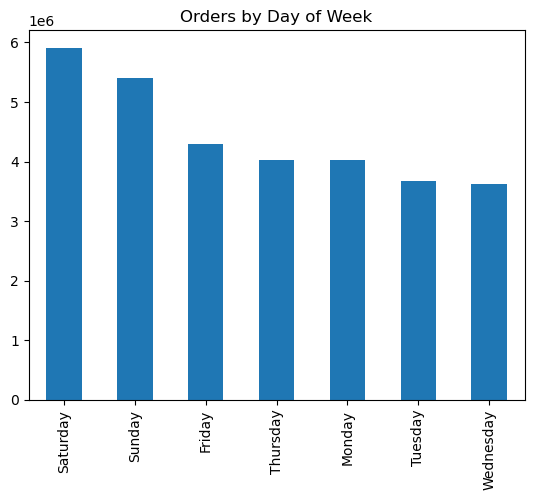

In [34]:
# Bar Chart of Orders by Day of Week
bar_1 = df_2['orders_day_of_week'].value_counts().sort_values(ascending = False).plot.bar(title = 'Orders by Day of Week')

Busiest days are Saturday and Sunday. Least busiest days are Tuesday and Wednesday.

In [35]:
# Export Visual
bar_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 bar_1_orders_dow.png'))

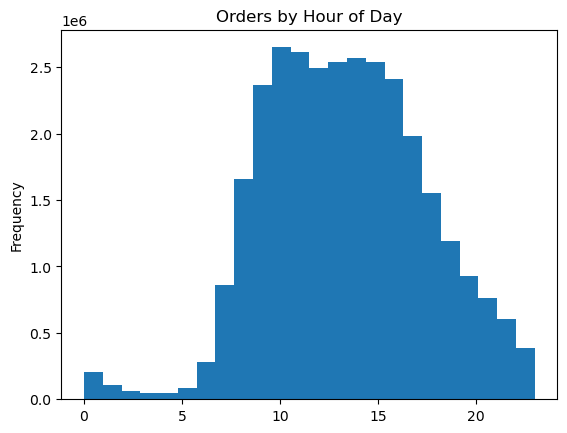

In [36]:
# Histogram of Orders by Hour of Day
hist_1 = df_2['order_hour_of_day'].plot.hist(bins = 24, title = 'Orders by Hour of Day')

Busiest time between 9AM and 5PM.

In [37]:
# Export Visual
hist_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 hist_1_orders_hod.png'))

# Question 2
They also want to know whether there are particular times of the day when people spend the most money, as this might inform the type of products they advertise at these times.

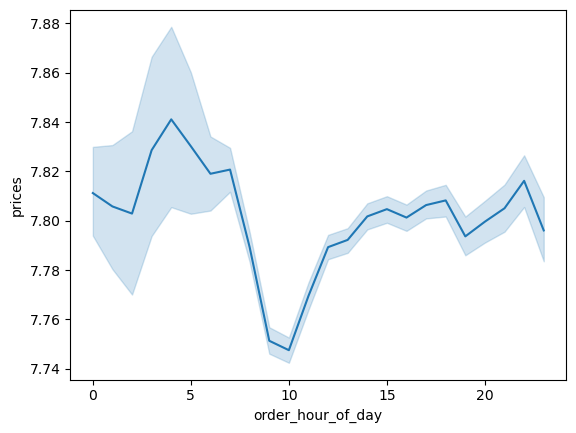

In [42]:
# Line Graph of Expenditure by Hour of Day
line_1 = sns.lineplot(data = df_2, x = 'order_hour_of_day', y = 'prices')

Highest expense from 3AM to 5AM. Lowest expense at 10AM. These results are unexpected and don't line up with the results from the "Orders by Hour of Day" histogram. It actually seems to show the exact opposite result.

In [43]:
# Export Visual
line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 line_1_orders_hod.png'))

In [4]:
# Another method for "Line Graph of Expenditure by Hour of Day" as the previous results don't make sense
avg_prices = df_2.groupby('order_hour_of_day')['prices'].agg(np.mean).reset_index()

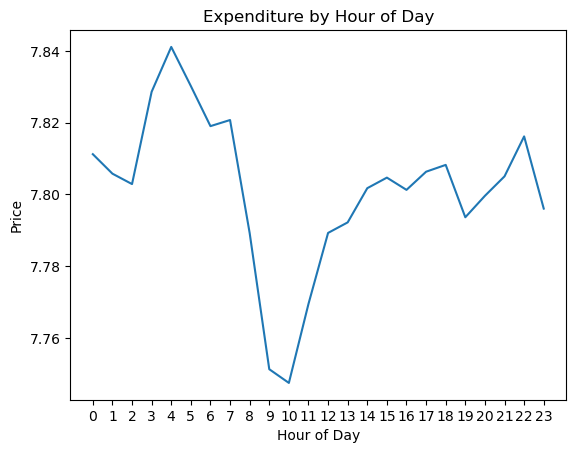

In [12]:
fig, spend_hod = plt.subplots()
spend_hod.plot(avg_prices['order_hour_of_day'], avg_prices['prices'])

spend_hod.set_xlabel('Hour of Day')
spend_hod.set_ylabel('Price')
spend_hod.set_title('Expenditure by Hour of Day')
spend_hod.set_xticks(avg_prices['order_hour_of_day'], minor=False)

plt.show()

The results are the same as before. This plot will not be exported.

# Question 3
Instacart has a lot of products with different price tags. Marketing and sales want to use simpler price range groupings to help direct their efforts.

In [44]:
# Bar Chart of Price Range Groups
df_2.loc[df_2['prices'] < 7.5, 'price_range'] = 'Low-range Product'
df_2.loc[(df_2['prices'] >= 7.5) & (df_2['prices'] < 17.5), 'price_range'] = 'Mid-range Product'
df_2.loc[df_2['prices'] >= 17.5, 'price_range'] = 'High-range Product'

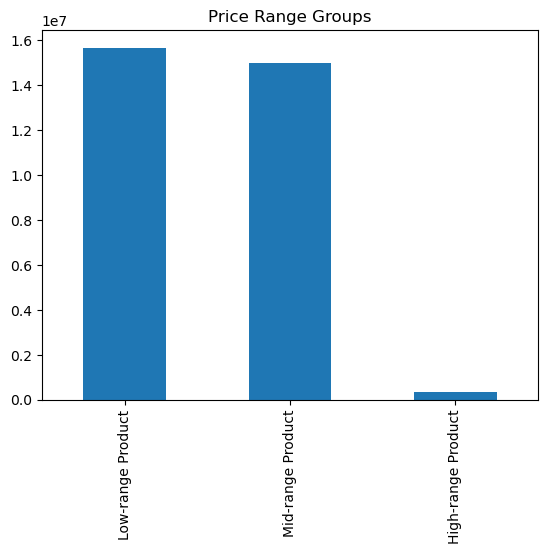

In [45]:
bar_2 = df_2['price_range'].value_counts().plot.bar(title = 'Price Range Groups')

Most products fall into the low and medium price range.

In [46]:
# Export Visual
bar_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 bar_2_price_groups.png'))

# Question 4
Are there certain types of products that are more popular than others? The marketing and sales teams want to know which departments have the highest frequency of product orders.

In [24]:
# Labeling Departments
df_2.loc[df_2['department_id'] == 1, 'Department'] = 'Frozen'
df_2.loc[df_2['department_id'] == 2, 'Department'] = 'Other'
df_2.loc[df_2['department_id'] == 3, 'Department'] = 'Bakery'
df_2.loc[df_2['department_id'] == 4, 'Department'] = 'Produce'
df_2.loc[df_2['department_id'] == 5, 'Department'] = 'Alcohol'
df_2.loc[df_2['department_id'] == 6, 'Department'] = 'International'
df_2.loc[df_2['department_id'] == 7, 'Department'] = 'Beverages'
df_2.loc[df_2['department_id'] == 8, 'Department'] = 'Pets'
df_2.loc[df_2['department_id'] == 9, 'Department'] = 'Dry Goods'
df_2.loc[df_2['department_id'] == 10, 'Department'] = 'Bulk'
df_2.loc[df_2['department_id'] == 11, 'Department'] = 'Personal Care'
df_2.loc[df_2['department_id'] == 12, 'Department'] = 'Meat/Seafood'
df_2.loc[df_2['department_id'] == 13, 'Department'] = 'Pantry'
df_2.loc[df_2['department_id'] == 14, 'Department'] = 'Breakfast'
df_2.loc[df_2['department_id'] == 15, 'Department'] = 'Canned Goods'
df_2.loc[df_2['department_id'] == 16, 'Department'] = 'Dairy'
df_2.loc[df_2['department_id'] == 17, 'Department'] = 'Household'
df_2.loc[df_2['department_id'] == 18, 'Department'] = 'Babies'
df_2.loc[df_2['department_id'] == 19, 'Department'] = 'Snacks'
df_2.loc[df_2['department_id'] == 20, 'Department'] = 'Deli'
df_2.loc[df_2['department_id'] == 21, 'Department'] = 'Missing'

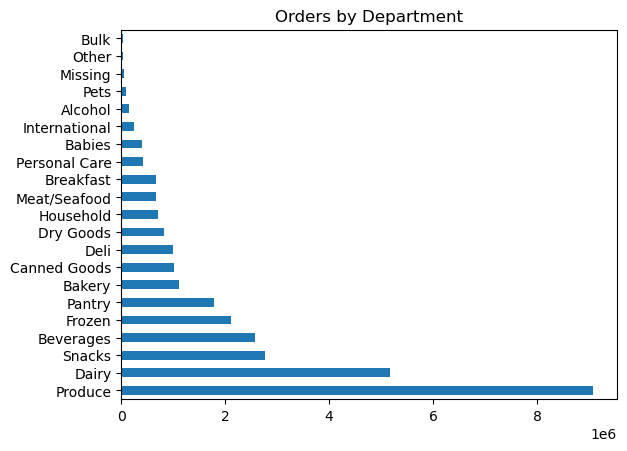

In [49]:
# Bar Chart of Orders by Department
bar_3 = df_2['Department'].value_counts().plot.barh(title = 'Orders by Department')

Produce has significantly more orders than the other departments.

In [50]:
# Export Visual
bar_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 bar_3_departments.png'))

# Question 5
What’s the distribution among users in regards to their brand loyalty (i.e., how often do they return to Instacart)?

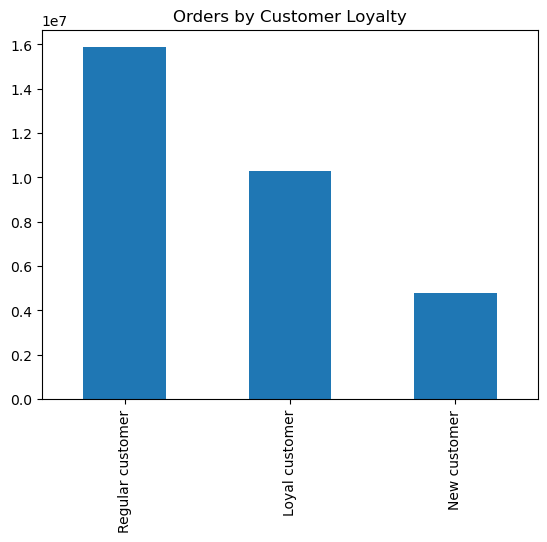

In [51]:
# Bar Chart of Orders by Customer Loyalty
bar_4 = df_2['loyalty_flag'].value_counts().plot.bar(title = 'Orders by Customer Loyalty')

Regular customers submit the most orders.

In [52]:
# Export Visual
bar_4.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 bar_4_loyalty.png'))

# Question 6
Are there differences in ordering habits based on a customer’s loyalty status?

In [53]:
# Bar Chart of Customer Loyalty by Department
dept_loyalty = df_2.groupby(['Department', 'loyalty_flag']).size().unstack(fill_value=0)

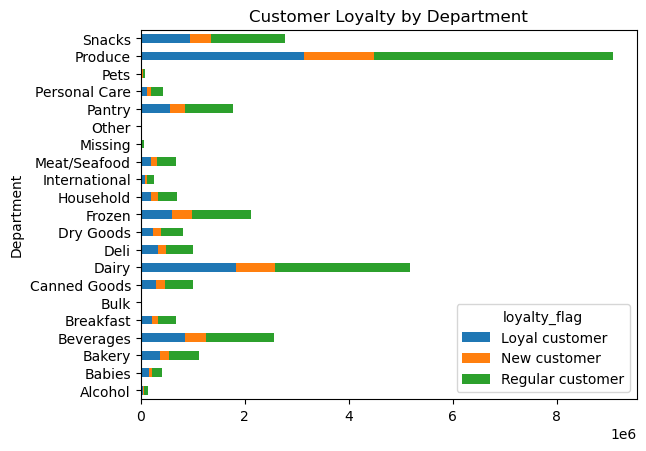

In [54]:
bar_5 = dept_loyalty.plot.barh(stacked = True, title = 'Customer Loyalty by Department')

No major difference seen between the loyalty groups.

In [55]:
# Export Visual
bar_5.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 bar_5_loyalty.png'))

Note 4: A memory error occured at this point. The script will be closed/halted and only the previous lines necessary for finishing the task will be run again. The following line graph will be skipped for now as it is paticularly memory intensive. 

In [4]:
# Line Graph of Loyalty and Hour of Day
loyalty_hod = pd.crosstab(index=df_2['order_hour_of_day'], columns=df_2['loyalty_flag'])

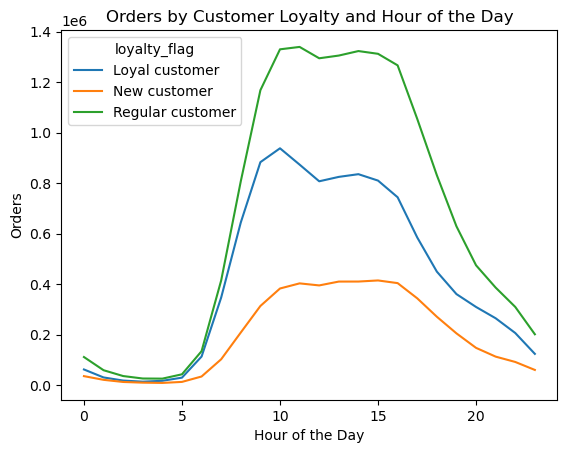

In [7]:
line_2 = loyalty_hod.plot(kind='line')

plt.title('Orders by Customer Loyalty and Hour of the Day')
plt.xlabel("Hour of the Day")
plt.ylabel("Orders")

plt.show()

Customers place orders during the same hours of the day regardless of loyalty.

In [8]:
# Export Visual
line_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 line_2_loyalty.png'))

# Question 7
Are there differences in ordering habits based on a customer’s region?

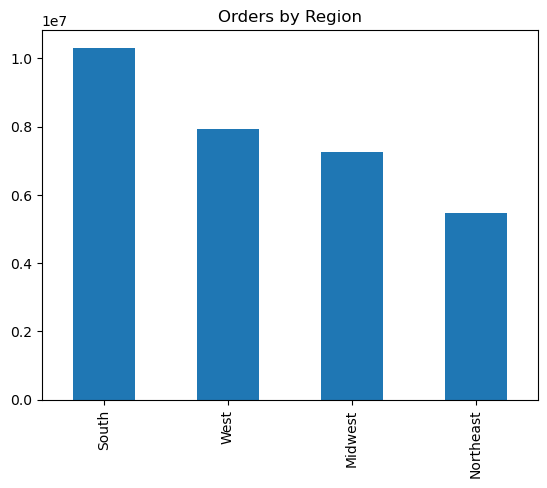

In [25]:
# Bar Chart of Orders by Region
bar_6 = df_2['region'].value_counts().plot.bar(title = 'Orders by Region')

The South region has the most orders and the Northeast region has the least.

In [26]:
# Export Visual
bar_6.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 bar_6_regions.png'))

# Question 8
Is there a connection between age and family status in terms of ordering habits?

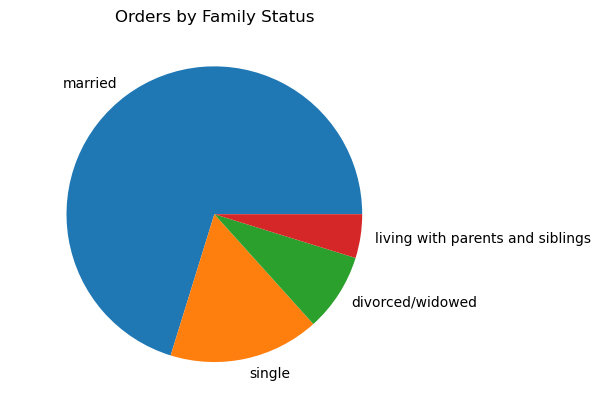

In [27]:
# Pie Chart of Orders by Family Status
pie_1 = df_2['marital_status'].value_counts().plot.pie(ylabel = ' ', title = 'Orders by Family Status')

There are significantly more orders placed by married customers.

In [28]:
pie_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 pie_1_family_status.png'))

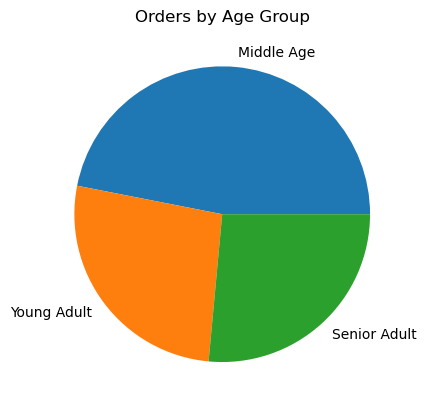

In [29]:
# Pie Chart of Orders by Age Group
pie_2 = df_2['age_group'].value_counts().plot.pie(ylabel = ' ', title = 'Orders by Age Group')

More orders are placed by middle aged customers.

In [30]:
pie_2.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 pie_2_age_group.png'))

# Question 9
What different classifications does the demographic information suggest? Age? Income? Certain types of goods? Family status?

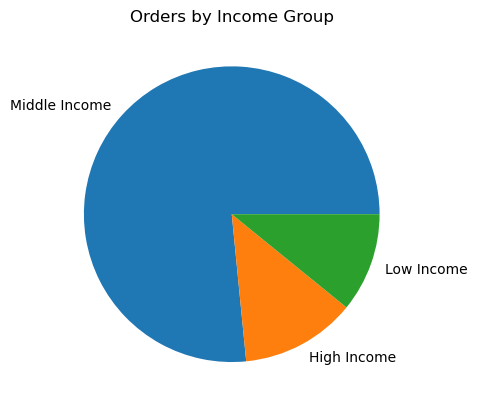

In [31]:
# Pie Chart of Orders by Income Group
pie_3 = df_2['income_group'].value_counts().plot.pie(ylabel = ' ', title = 'Orders by Income Group')

There are significantly more orders placed by middle income customers.

In [32]:
pie_3.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 pie_3_income_group.png'))

In [33]:
df_2.loc[df_2['dependants'] == 0, 'dep_group'] = 'No Dependants'
df_2.loc[df_2['dependants'] > 0, 'dep_group'] = 'Yes Dependants'

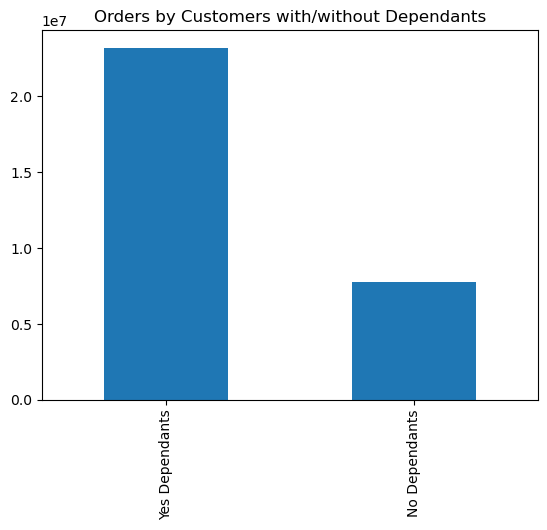

In [34]:
# Bar Chart of Dependants
bar_7 = df_2['dep_group'].value_counts().plot.bar(title = 'Orders by Customers with/without Dependants')

More orders are placed by customers with dependants.

In [35]:
# Export Visual
bar_7.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 bar_7_dependants_group.png'))

# Question 10
What differences can you find in ordering habits of different customer profiles? Consider the price of orders, the frequency of orders, the products customers are ordering, and anything else you can think of.

In [25]:
# Bar Chart of Departments by User Profile
dept_profile = df_2.groupby(['Department', 'user_profile']).size().unstack(fill_value=0)

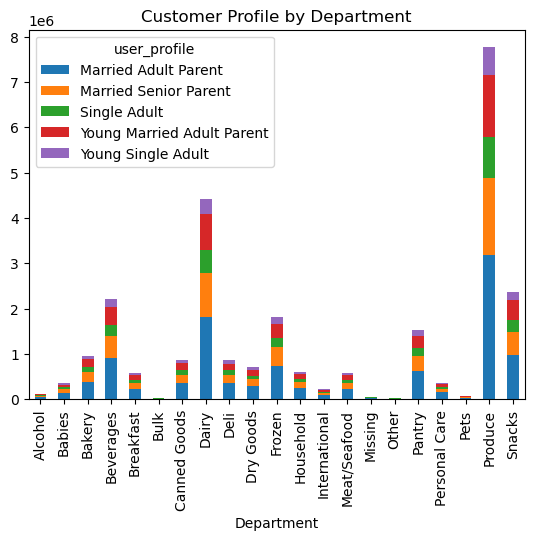

In [26]:
bar_8 = dept_profile.plot.bar(stacked = True, title = 'Customer Profile by Department')

There is no apparent difference between user profiles. If one profile ordered more from a certain department, it is because that profile orders more in general.

In [27]:
# Export Visual
bar_8.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 bar_8_dept_profile.png'))

In [28]:
# Bar Chart of Departments by Region
dept_region = df_2.groupby(['Department', 'region']).size().unstack(fill_value=0)

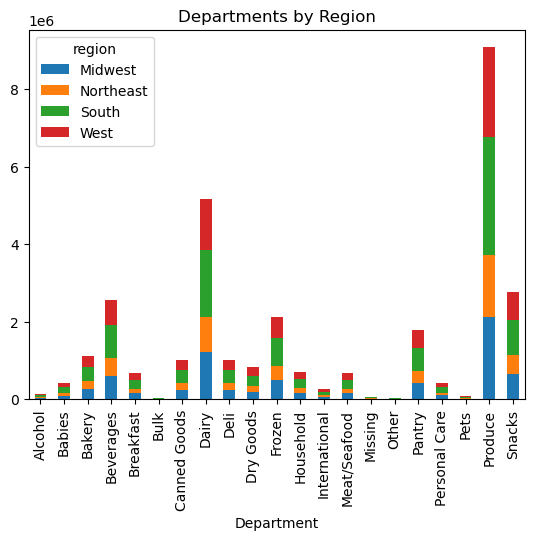

In [29]:
bar_9 = dept_region.plot.bar(stacked = True, title = 'Departments by Region')

There is no apparent difference between regions. If one region ordered more from a certain department, it is because that regions orders more in general.

In [30]:
# Export Visual
bar_9.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'Task 4.10 bar_9_dept_region.png'))

# Aggregations

In [42]:
# Age Groups and Frequency
df_2.groupby('age_group').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                              mean  min   max
age_group                                    
Middle Age               10.813115  0.0  30.0
Senior Adult             10.791788  0.0  30.0
Young Adult              10.823742  0.0  30.0

In [43]:
# Income Groups and Frequency
df_2.groupby('income_group').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                               mean  min   max
income_group                                  
High Income               10.684338  0.0  30.0
Low Income                11.175807  0.0  30.0
Middle Income             10.779425  0.0  30.0

In [44]:
# Dependants and Frequency
df_2.groupby('dependants').agg({'days_since_last_order': ['mean', 'min', 'max']})

days_since_last_order           
                            mean  min   max
dependants                                 
0                      10.791950  0.0  30.0
1                      10.802001  0.0  30.0
2                      10.830997  0.0  30.0
3                      10.816223  0.0  30.0

In [45]:
# Age Groups and Prices
df_2.groupby('age_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                  mean  min   max
age_group                        
Middle Age    7.789513  1.0  25.0
Senior Adult  7.795896  1.0  25.0
Young Adult   7.784160  1.0  25.0

In [46]:
# Income Groups and Prices
df_2.groupby('income_group').agg({'prices': ['mean', 'min', 'max']})

prices           
                   mean  min   max
income_group                      
High Income    7.935695  1.0  25.0
Low Income     6.707347  1.0  25.0
Middle Income  7.919333  1.0  25.0

In [47]:
# Dependants and Prices
df_2.groupby('dependants').agg({'prices': ['mean', 'min', 'max']})

prices           
                mean  min   max
dependants                     
0           7.788800  1.0  25.0
1           7.795115  1.0  25.0
2           7.783118  1.0  25.0
3           7.792076  1.0  25.0

Note 5: All visuals have been generated/saved except for the line graph of Question 6. The script will be closed/halted and only the lines necessary for that graph will be run again.

Note 6: All planned visuals have been generated and the script is complete. 